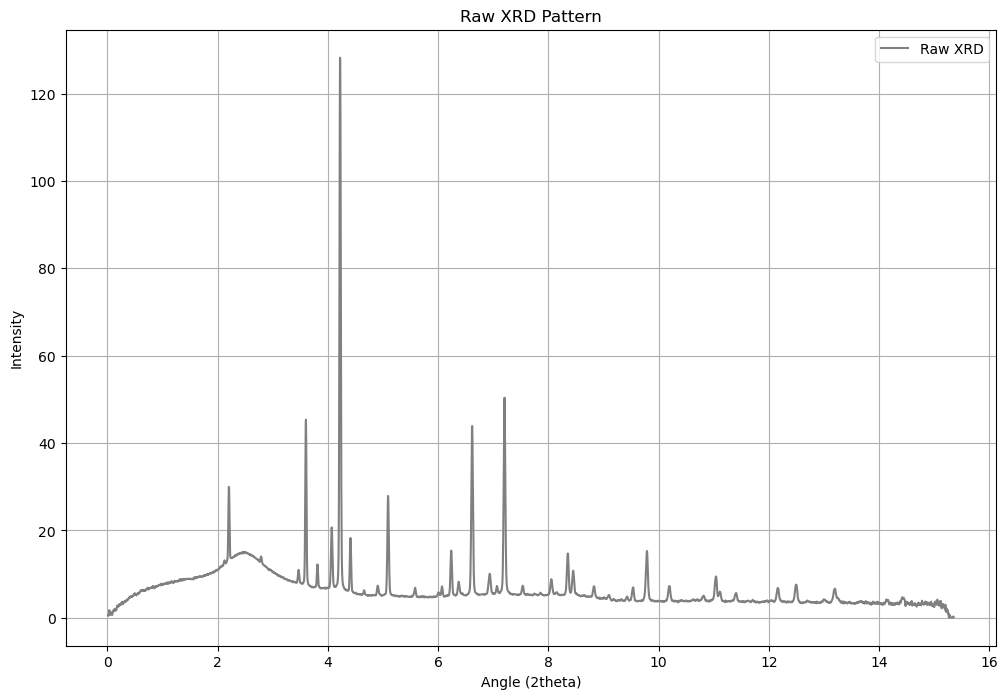

The tallest peak is at: 4.22 degrees
R² value: 0.8787
FWHM: 0.0306
Crystallite Size: 185.53 nm


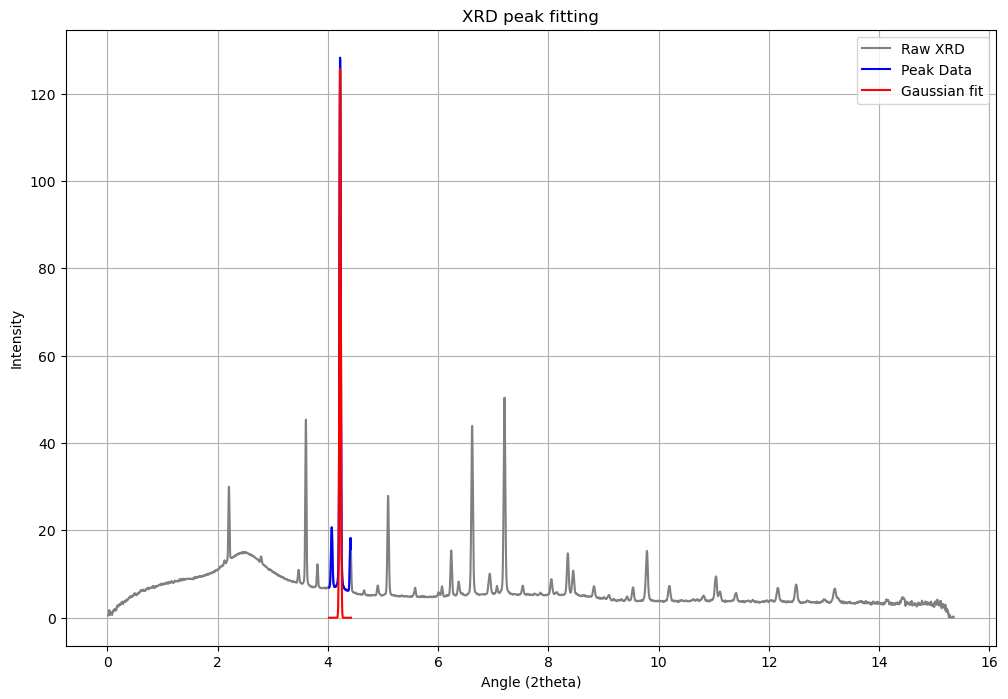

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Import file
file = r"C:\Users\chira\OneDrive\Desktop\750-950C ramp C1-2\Co3O4_Fe2O3_goodposition_XRD_750C_ramp_950C_C1-2_20250226-202957_5f79d7_primary-dk_sub_image-00000.xy"
data = pd.read_csv(file, comment='#', sep=r'\s+', header=None, names=["Angle_deg", "Intensity"])

#  Extract columns
angle = data["Angle_deg"]
intensity = data["Intensity"]

plt.figure(figsize=(12, 8))
plt.plot(angle, intensity, label="Raw XRD", color='gray')
plt.xlabel("Angle (2theta)")
plt.ylabel("Intensity")
plt.title("Raw XRD Pattern")
plt.legend()
plt.grid()
plt.show()

# Find tallest peak
peak_index = intensity.idxmax()
peak_angle = angle[peak_index]
print("The tallest peak is at:", round(peak_angle, 2), "degrees")

#  Select region near tallest peak (+-0.2 degrees)
x_peak = []
y_peak = []

for i in range(len(angle)):
    if angle[i] > peak_angle - 0.2 and angle[i] < peak_angle + 0.2:
        x_peak.append(angle[i])
        y_peak.append(intensity[i])

x_peak = np.array(x_peak)
y_peak = np.array(y_peak)

#  Define Gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Initial guess - amplitude, center, width
guess = [y_peak.max(), peak_angle, 0.05]

# do the fit
params, _ = curve_fit(gaussian, x_peak, y_peak, p0=guess)
y_fit = gaussian(x_peak, *params)

r2 = r2_score(y_peak, y_fit)
print(f"R² value:", round(r2, 4))


 #Calculate FWHM and size using debye- scherrer equation
fwhm = 2.3548 * width
K = 0.9
wavelength = 0.11  
theta = center / 2
theta_rad = math.radians(theta)
fwhm_rad = math.radians(fwhm)
size = (K * wavelength) / (fwhm_rad * math.cos(theta_rad))

print(f"FWHM: {fwhm:.4f}")
print(f"Crystallite Size: {size:.2f} nm")


# Plot
plt.figure(figsize=(12, 8))
plt.plot(angle, intensity, label="Raw XRD", color='gray')
plt.plot(x_peak, y_peak, 'blue', label="Peak Data")
plt.plot(x_peak, y_fit, 'red', label=f"Gaussian fit")
plt.xlabel("Angle (2theta)")
plt.ylabel("Intensity")
plt.title("XRD peak fitting")
plt.legend()
plt.grid()
plt.show()


In [153]:
print(data)

      Angle_deg  Intensity
0      0.013873   0.628736
1      0.017837   0.475188
2      0.021801   0.800717
3      0.025765   0.703553
4      0.029729   1.109434
...         ...        ...
3854  15.322225   0.023152
3855  15.338081   0.035741
3856  15.342044   0.209529
3857  15.346008   0.309602
3858  15.349972   0.227707

[3859 rows x 2 columns]
